# **Intrusion Detection Using Machine Learning Techniques On CIC-IDS2017 Dataset**

Created By [Mohammad Amirifard](https://www.linkedin.com/in/mohammad-amirifard/)

**This Notebook is called Part1_EDA**. In this notebook we will work on exploratory data analysis (EDA).

For **next notebook** click on this [link](https://)



<img src="https://www.teligentsolutions.com/wp-content/uploads/2015/04/Teligent_Solutions_Intrusion_Detection.jpg" alt="Image" />



#**Table of Content**



<div class="toc">
  <h2>Table of Contents</h2>
  <ul>
    <li><a href="#Import-Libraries">Import Libraries</a></li>
    <li><a href="#Download-CIC-IDS2017-Dataset">Download CIC-IDS2017 Dataset</a></li>
    <li><a href="#Esploratory-Data-Analysis">Exploratory Data Analysis</a>
      <ul>
        <li><a href="#Load-datasets">Load datasets</a></li>
        <li><a href="#Unique-labels">Unique labels</a></li>
      </ul>
    </li>
    <li><a href="#Featrue-Engineering">Feature Engineering</a>
      <ul>
        <li><a href="#Remove-columns-including-unique-items">Remove columns including unique items</a></li>
        <li><a href="#Fill-inf-and-Nan-values">Fill inf and NaN values</a></li>
        <li><a href="#Feature-Selection">Feature Selection</a>
          <ul>
            <li><a href="#1_Mutual-Info-filter">1. Mutual Info filter</a></li>
            <li><a href="#2_Anova-filter">2. Anova filter</a></li>
            <li><a href="#3_Random-Forest">3. Random Forest</a></li>
          </ul>
        </li>
      </ul>
    </li>
    <li><a href="#Save-results">Save results</a></li>
  </ul>
</div>


<h1 id="Import-Libraries">Import Libraries</h1>


Here we import libraries on which we need to work.

In [ ]:
! pip install -qq gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os, gdown
import zipfile, time
import warnings
import joblib
warnings.filterwarnings('ignore')
initial_time = time.time()

<h1 id="Download-CIC-IDS2017-Dataset">Download CIC-IDS2017 Dataset</h1>


Here we download dataset from google drive and try to unzip it

In [ ]:
def download_file_from_google_drive(file_id, destination):

    """
    Input: file_id (Obtained from google drive), destionation (For saving the file)
    Output: _ (Download the file in destination directory)
    """
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, destination, quiet=True) # download file using given URL


def unzip_dataset(extraction_dir):

  """
  Input: Extraction_dir (Direction of dataset to unzip into)
  Output: _ (Exract the zip file in the given direction)
  """

  # Ensure the extraction directory exists
  os.makedirs(extraction_dir, exist_ok=True)

  # Unzip the file
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      zip_ref.extractall(extraction_dir)



# Setup variables to download dataset
current_working_dir = os.getcwd()
destination = current_working_dir
zip_file_path = os.path.join(destination, 'dataset.zip')
file_id =  '1a7z1lGFg-shaBUTfmPewFAebCc8FDhx5' # File Id
extraction_dir = os.path.join(destination,'dataset/')

# call functions
download_file_from_google_drive(file_id, zip_file_path) # Download
unzip_dataset(extraction_dir)                           # Unzip

<h1 id="Esploratory-Data-Analysis">Exploratory Data Analysis</h1>


<h2 id="Load-datasets">Load datasets</h2>

On this [link](https://www.unb.ca/cic/datasets/ids-2017.html), You can access to all information about dataset.

In [ ]:
# Let's load all csv files.

Friday_Morning_pcap_df = pd.read_csv(os.path.join(extraction_dir,'MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv'))
Friday_Afternoon_PortScand_df = pd.read_csv(os.path.join(extraction_dir,'MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'))
Friday_Afternoon_DDos_df = pd.read_csv(os.path.join(extraction_dir,'MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'))
Monday_df = pd.read_csv(os.path.join(extraction_dir,'MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv'))
Thursday_Afternoon_Infilteration_df =pd.read_csv( os.path.join(extraction_dir,'MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv'))
Thursday_Morning_WebAttacks_df = pd.read_csv(os.path.join(extraction_dir,'MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'))
Tuesday_pcap_ISCX_df = pd.read_csv(os.path.join(extraction_dir,'MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv'))
Wednesday_pcap_ISCX_df = pd.read_csv(os.path.join(extraction_dir,'MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv'))




In [ ]:
# Let's see one of them.
display(Friday_Morning_pcap_df)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


<h2 id="Unique-labels">Unique labels</h2>


In [ ]:
def find_uniques(df):

  """
  This function finds the unique items available in the column called "Label" in datasets.
  Input: df (Each dataframe you would like to find)
  Output: unique_lables, no_of_Bengine(Normal), and no_of_attack
  """


  # Let's look at its shape
  print('For this dataset we have:')
  print('*'*100)
  print(f'No of rows (instances): {df.shape[0]} \nNo of columns (features + Label): {df.shape[1]}')
  print('*'*100)
  # Let's look at the type of traffic
  # Be careful about column names. some of them include white space.
  unique_lables = np.unique(df[" Label"], return_counts=True)[0]
  print('unique_lables:',unique_lables)

  if len(unique_lables)==2:
    no_of_Bengine , no_of_attack = np.unique(df[" Label"], return_counts=True)[1]
    print(f'There are [{no_of_Bengine}] and [{no_of_attack}] traffic flows for normal and attack behaviours, respectively.')
    print(f'Therfore, we see there are {len(unique_lables)} types of traffic: [{unique_lables[0]}] --> denotes for Normal Traffic and [{unique_lables[1]}]-->Denotes for Attack_1. ')
    fig, ax = plt.subplots(figsize=(6,4))
    bars = plt.bar([f'{unique_lables[0]} (Normal)',f'{unique_lables[1]} (Anomaly)'],[no_of_Bengine,no_of_attack ])

  elif len(unique_lables)==3:
    no_of_Bengine , no_of_attack_1,no_of_attack_2 = np.unique(df[" Label"], return_counts=True)[1]
    print(f'There are [{no_of_Bengine}] and [{no_of_attack_1}] and [{no_of_attack_2}] traffic flows for normal and attacks behaviours, respectively.')
    print(f'Therfore, we see there are {len(unique_lables)} types of traffic: [{unique_lables[0]}] --> denotes for Normal Traffic and [{unique_lables[1]}]-->Denotes for Attack_1 and [{unique_lables[2]}]-->Denotes for Attack_2.')

    fig, ax = plt.subplots(figsize=(6,4))
    bars = plt.bar([f'{unique_lables[0]} (Normal)',f'{unique_lables[1]}',f'{unique_lables[2]}'],[no_of_Bengine,no_of_attack_1,no_of_attack_2])
  else:
    no_of_Bengine = np.unique(df[" Label"], return_counts=True)[1][0]
    print(f'There are [{no_of_Bengine}] traffic flows for Normal behaviours. We do not have Attack in this dataset')
    fig, ax = plt.subplots(figsize=(6,4))
    bars = plt.bar([f'{unique_lables[0]} (Normal)'],[no_of_Bengine])

  # Add value labels to each bar
  for bar in bars:
      yval = bar.get_height()
      ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom',color='r',fontsize=10)


  if len(unique_lables)==2:
    return unique_lables,no_of_Bengine,no_of_attack

  elif len(unique_lables)>2:
    return unique_lables,no_of_Bengine,no_of_attack_1, no_of_attack_2


  else:
    return unique_lables,no_of_Bengine




For this dataset we have:
****************************************************************************************************
No of rows (instances): 191033 
No of columns (features + Label): 79
****************************************************************************************************
unique_lables: ['BENIGN' 'Bot']
There are [189067] and [1966] traffic flows for normal and attack behaviours, respectively.
Therfore, we see there are 2 types of traffic: [BENIGN] --> denotes for Normal Traffic and [Bot]-->Denotes for Attack_1. 


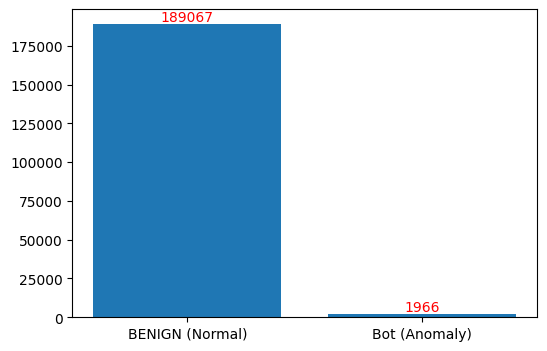

In [ ]:
unique_lables,no_of_Bengine,no_of_attack = find_uniques(df = Friday_Morning_pcap_df)

For this dataset we have:
****************************************************************************************************
No of rows (instances): 286467 
No of columns (features + Label): 79
****************************************************************************************************
unique_lables: ['BENIGN' 'PortScan']
There are [127537] and [158930] traffic flows for normal and attack behaviours, respectively.
Therfore, we see there are 2 types of traffic: [BENIGN] --> denotes for Normal Traffic and [PortScan]-->Denotes for Attack_1. 


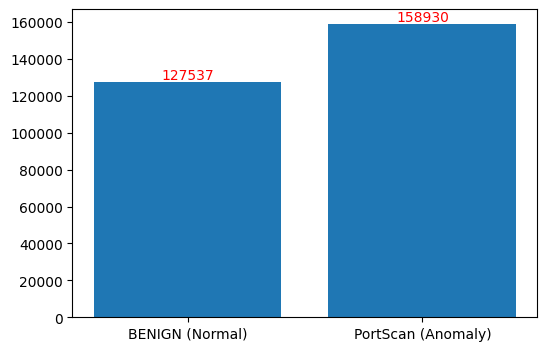

In [ ]:
unique_lables,no_of_Bengine,no_of_attack = find_uniques(df = Friday_Afternoon_PortScand_df)

For this dataset we have:
****************************************************************************************************
No of rows (instances): 225745 
No of columns (features + Label): 79
****************************************************************************************************
unique_lables: ['BENIGN' 'DDoS']
There are [97718] and [128027] traffic flows for normal and attack behaviours, respectively.
Therfore, we see there are 2 types of traffic: [BENIGN] --> denotes for Normal Traffic and [DDoS]-->Denotes for Attack_1. 


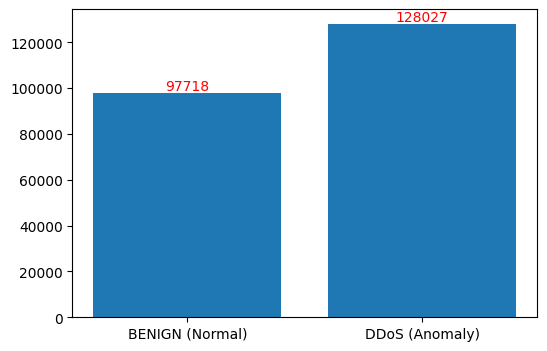

In [ ]:
unique_lables,no_of_Bengine,no_of_attack = find_uniques(df = Friday_Afternoon_DDos_df)

For this dataset we have:
****************************************************************************************************
No of rows (instances): 445909 
No of columns (features + Label): 79
****************************************************************************************************
unique_lables: ['BENIGN' 'FTP-Patator' 'SSH-Patator']
There are [432074] and [7938] and [5897] traffic flows for normal and attacks behaviours, respectively.
Therfore, we see there are 3 types of traffic: [BENIGN] --> denotes for Normal Traffic and [FTP-Patator]-->Denotes for Attack_1 and [SSH-Patator]-->Denotes for Attack_2.


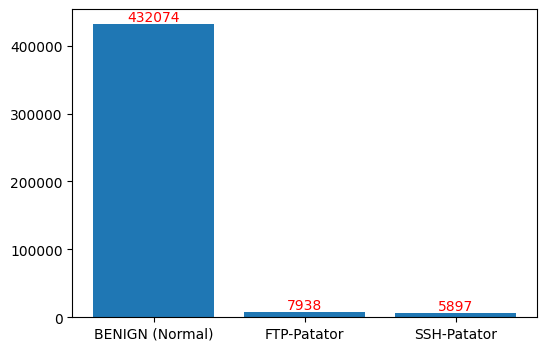

In [ ]:
unique_lables,no_of_Bengine,no_of_attack1,no_of_attack_2 = find_uniques(df = Tuesday_pcap_ISCX_df)

For this dataset we have:
****************************************************************************************************
No of rows (instances): 529918 
No of columns (features + Label): 79
****************************************************************************************************
unique_lables: ['BENIGN']
There are [529918] traffic flows for Normal behaviours. We do not have Attack in this dataset


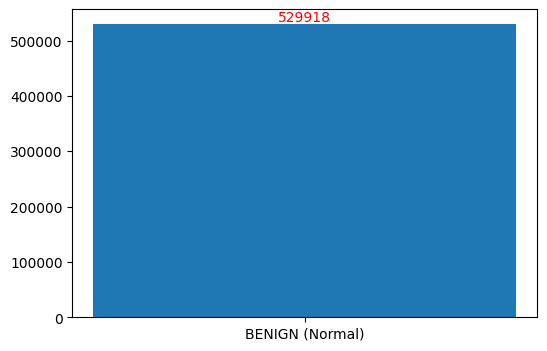

In [ ]:
unique_lables,no_of_Bengine = find_uniques(df = Monday_df)

In [ ]:
# Lets concatenate all dataframes together.
df = pd.concat([Friday_Morning_pcap_df,Friday_Afternoon_PortScand_df,Friday_Afternoon_DDos_df,
                Monday_df,Thursday_Afternoon_Infilteration_df,Thursday_Morning_WebAttacks_df,
                Tuesday_pcap_ISCX_df,Wednesday_pcap_ISCX_df])


In [ ]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445904,53,155,2,2,88,120,44,44,44.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
445905,59317,110,1,1,0,0,0,0,0.0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
445906,53,166,2,2,88,188,44,44,44.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
445907,54726,81,1,1,0,0,0,0,0.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [ ]:
# Let's look at unique items available in dataframe
print('These are types of traffic we have:')
print('*'*100)
np.unique(df[' Label'])

These are types of traffic we have:
****************************************************************************************************


array(['BENIGN', 'Bot', 'DDoS', 'FTP-Patator', 'Infiltration', 'PortScan',
       'SSH-Patator', 'Web Attack � Brute Force',
       'Web Attack � Sql Injection', 'Web Attack � XSS'], dtype=object)

In [ ]:
# Let's try to choose better name for them

# 'Web Attack � Brute Force' --> converted to 'Brute Force'
df.loc[df[' Label'].str.startswith('Web Attack � Brute Force'), ' Label'] = 'Brute Force'

#'Web Attack � Sql Injection'--> converted to 'Sql Injection'
df.loc[df[' Label'].str.startswith('Web Attack � Sql Injection'), ' Label'] = 'Sql Injection'

# 'Web Attack � XSS' --> converted to 'XSS'
df.loc[df[' Label'].str.startswith('Web Attack � XSS'), ' Label'] = 'XSS'

# Also, We know that 'SSH-Patator' and 'FTP-Patator' are considered as Brute Force Attach. So:
df.loc[df[' Label'].str.startswith('SSH'), ' Label'] = 'Brute Force'
df.loc[df[' Label'].str.startswith('FTP'), ' Label'] = 'Brute Force'



# We can conisder Bot and Infiltration attacks as one group called Botnet attack
df.loc[df[' Label'].str.startswith('Bot'), ' Label'] = 'Botnet'
df.loc[df[' Label'].str.startswith('Infiltration'), ' Label'] = 'Botnet'


# We can conisder Brute Force and Sql Injection and XSS attacks as one group called Exploitation attack
df.loc[df[' Label'].str.startswith('Brute Force'), ' Label'] = 'Exploitation'
df.loc[df[' Label'].str.startswith('Sql Injection'), ' Label'] = 'Exploitation'
df.loc[df[' Label'].str.startswith('XSS'), ' Label'] = 'Exploitation'


print('Now, These are new types of traffic we have:')
print('*'*100)
np.unique(df[' Label'])

Now, These are new types of traffic we have:
****************************************************************************************************


array(['BENIGN', 'Botnet', 'DDoS', 'Exploitation', 'PortScan'],
      dtype=object)

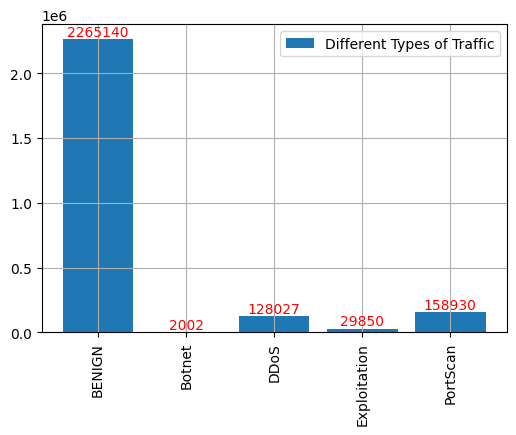

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
labels = np.unique(df[' Label'],return_counts=True)[0]
values =np.unique(df[' Label'],return_counts=True)[1]
bars = plt.bar(labels,values,label='Different Types of Traffic')
plt.grid()
plt.legend()
plt.xticks(rotation=90)

# Add value labels to each bar
for bar in bars:
  yval = bar.get_height()
  ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom',color='r',fontsize=10)

In [ ]:
# Let's look at the features
feature_list = list(df.columns[:-1])
print('Number of features in this list:',len(feature_list))
print('*'*100)
print('name_of_features:\n',feature_list)
print('*'*100)
print(" Oops, lots of features. Let's do feature engineering")

Number of features in this list: 78
****************************************************************************************************
name_of_features:
 [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean'

<h1 id="Featrue-Engineering">Feature Engineering</h1>


<h2 id="Remove-columns-including-unique-items">Remove columns including unique items</h2>


In [ ]:
# Let's look at all of them and find thier uniqe items

# We can remove those which have one unique item, meaning taht they cannot affect the label result.
def remove_features_with_one_item(dataframe,feature_list):

  """
  This function find columns that have just a unique item, meaning that these columns don't affect target.So, We should remove them.
  Input: dataframe,feature_list
  Output: new_feature_list and new_dataframe which have less values.
  """

  removed_feature_list = []
  for feature in feature_list:
    unique_items = np.unique(dataframe[feature])
    if len(unique_items)>1 : # Bigger than 1 means we have more than 1 unique item in this feature.
      removed_feature_list.append(feature)
      feature_list.remove(feature)

    else:
      pass


  print('The following features have been removed from the original dataframe.')
  print(removed_feature_list)
  new_feature_list = feature_list
  new_dataframe = dataframe.drop(removed_feature_list,axis=1)

  return new_feature_list, new_dataframe


# Call function
feature_list, clean_df = remove_features_with_one_item(df,feature_list)
# Now, let's again look at shape
print('*'*100)
print(f'No of rows (instances): {clean_df.shape[0]}. \nNo of columns (features + Label): {clean_df.shape[1]}')
print('Great we dropped 35 features, since they had one uniqe item in different instances.')

The following features have been removed from the original dataframe.
[' Destination Port', ' Total Fwd Packets', 'Total Length of Fwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Mean', 'Bwd Packet Length Max', ' Bwd Packet Length Mean', 'Flow Bytes/s', ' Flow IAT Mean', ' Flow IAT Max', 'Fwd IAT Total', ' Fwd IAT Std', ' Fwd IAT Min', ' Bwd IAT Mean', ' Bwd IAT Max', 'Fwd PSH Flags', ' Fwd URG Flags', ' Fwd Header Length', 'Fwd Packets/s', ' Min Packet Length', ' Packet Length Mean', ' Packet Length Variance', ' SYN Flag Count', ' PSH Flag Count', ' URG Flag Count', ' ECE Flag Count', ' Average Packet Size', ' Avg Bwd Segment Size', 'Subflow Fwd Packets', ' Subflow Bwd Packets', 'Init_Win_bytes_forward', ' act_data_pkt_fwd', 'Active Mean', ' Active Max', 'Idle Mean', ' Idle Max']
****************************************************************************************************
No of rows (instances): 2583949. 
No of columns (features + Label): 43
Great we dropped 35 feat

<h2 id="Fill-inf-and-Nan-values">Fill inf and NaN values</h2>


In [ ]:
# Look at inf values

index_of_inf_values1,column_of_inf_values1 = np.where(clean_df==np.inf)
print('Index_list of + inf values:\n',index_of_inf_values1)
print('\nColumn_list of + inf values:\n',column_of_inf_values1)
print('*'*100)
index_of_inf_values2,column_of_inf_values2 = np.where(clean_df==-np.inf)
print('Index_list of - inf values:\n',index_of_inf_values2)
print('\nColumn_list of - inf values:\n',column_of_inf_values2)

print('*'*100)
print('As shown above, in column number 7, we have values which are infinitive.')
print('So, we can replace them with nan values.')
clean_df.replace([np.inf, -np.inf], np.nan, inplace=True)

Index_list of + inf values:
 [    604    3786    4153 ... 2576418 2577669 2578398]

Column_list of + inf values:
 [7 7 7 ... 7 7 7]
****************************************************************************************************
Index_list of - inf values:
 []

Column_list of - inf values:
 []
****************************************************************************************************
As shown above, in column number 7, we have values which are infinitive.
So, we can replace them with nan values.


In [ ]:
# Let's look at missing values.
print("The following data shows that we have several missing values in our dataset")
print('*'*100)
clean_df.isnull().sum()


The following data shows that we have several missing values in our dataset
****************************************************************************************************


 Flow Duration                     0
 Total Backward Packets            0
 Total Length of Bwd Packets       0
 Fwd Packet Length Min             0
 Fwd Packet Length Std             0
 Bwd Packet Length Min             0
 Bwd Packet Length Std             0
 Flow Packets/s                 1834
 Flow IAT Std                      0
 Flow IAT Min                      0
 Fwd IAT Mean                      0
 Fwd IAT Max                       0
Bwd IAT Total                      0
 Bwd IAT Std                       0
 Bwd IAT Min                       0
 Bwd PSH Flags                     0
 Bwd URG Flags                     0
 Bwd Header Length                 0
 Bwd Packets/s                     0
 Max Packet Length                 0
 Packet Length Std                 0
FIN Flag Count                     0
 RST Flag Count                    0
 ACK Flag Count                    0
 CWE Flag Count                    0
 Down/Up Ratio                     0
 Avg Fwd Segment Size              0
 

In [ ]:
# We can fill nan  values forward fill method
clean_df.ffill(inplace = True)

# Let's look at missing values again.
print("The following data shows that we don't have several missing values in our dataset")
print('*'*100)

clean_df.isnull().sum()


The following data shows that we don't have several missing values in our dataset
****************************************************************************************************


 Flow Duration                  0
 Total Backward Packets         0
 Total Length of Bwd Packets    0
 Fwd Packet Length Min          0
 Fwd Packet Length Std          0
 Bwd Packet Length Min          0
 Bwd Packet Length Std          0
 Flow Packets/s                 0
 Flow IAT Std                   0
 Flow IAT Min                   0
 Fwd IAT Mean                   0
 Fwd IAT Max                    0
Bwd IAT Total                   0
 Bwd IAT Std                    0
 Bwd IAT Min                    0
 Bwd PSH Flags                  0
 Bwd URG Flags                  0
 Bwd Header Length              0
 Bwd Packets/s                  0
 Max Packet Length              0
 Packet Length Std              0
FIN Flag Count                  0
 RST Flag Count                 0
 ACK Flag Count                 0
 CWE Flag Count                 0
 Down/Up Ratio                  0
 Avg Fwd Segment Size           0
 Fwd Header Length.1            0
Fwd Avg Bytes/Bulk              0
 Fwd Avg Packe

<h2 id="Feature-Selection">Feature Selection</h2>


In [ ]:
# Shuffling the dataframe
clean_df = clean_df.sample(frac=1, random_state=42).reset_index(drop=True)


clean_df.info()
np.unique(clean_df[' Label'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583949 entries, 0 to 2583948
Data columns (total 43 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Flow Duration                int64  
 1    Total Backward Packets       int64  
 2    Total Length of Bwd Packets  int64  
 3    Fwd Packet Length Min        int64  
 4    Fwd Packet Length Std        float64
 5    Bwd Packet Length Min        int64  
 6    Bwd Packet Length Std        float64
 7    Flow Packets/s               float64
 8    Flow IAT Std                 float64
 9    Flow IAT Min                 int64  
 10   Fwd IAT Mean                 float64
 11   Fwd IAT Max                  int64  
 12  Bwd IAT Total                 int64  
 13   Bwd IAT Std                  float64
 14   Bwd IAT Min                  int64  
 15   Bwd PSH Flags                int64  
 16   Bwd URG Flags                int64  
 17   Bwd Header Length            int64  
 18   Bwd Packets/s        

array(['BENIGN', 'Botnet', 'DDoS', 'Exploitation', 'PortScan'],
      dtype=object)

<h3 id="1_Mutual-Info-filter">1. Mutual Info filter</h3>


In [ ]:
# As shown above, all features have type of int64 or float64, which means we are dealing with numerical features.
# Now, here we can use Mutual Information
from sklearn.feature_selection import mutual_info_classif

def Mutual_info(df,feature_list):

  """
  This function finds the mutual information score for each feature and target pair.
  Input: df (dataframe), feature_list (the list of feature otained before)
  output: best_feature_list (Those ones have highest scores)
  """
  # Compute Mutual Information between each feature and the target
  X = df[feature_list]
  y = df[' Label']
  mi_scores = mutual_info_classif(X, y)

  # Create a DataFrame to view the scores alongside feature names
  mi_scores_df = pd.DataFrame(mi_scores, index=X.columns, columns=['MI Scores'])

  # Sort
  mi_scores_df = mi_scores_df.sort_values(by='MI Scores',ascending=False)
  print("Let's see 20 most important features:")
  best_feature_list = mi_scores_df[:20].index
  best_feature_list = np.array(best_feature_list)
  display(mi_scores_df[:20])

  return best_feature_list

In [ ]:
best_feature_list_from_MI = Mutual_info(df=clean_df,feature_list=feature_list)

Let's see 20 most important features:


,MI Scores
Packet Length Std,0.387493
Subflow Fwd Bytes,0.358856
Total Length of Bwd Packets,0.323847
Subflow Bwd Bytes,0.323745
Avg Fwd Segment Size,0.299969
Init_Win_bytes_backward,0.297412
Max Packet Length,0.284961
Fwd Header Length.1,0.278570
Flow Duration,0.240108
Bwd Header Length,0.239646


<h3 id="2_Anova-filter">2. Anova filter</h3>


In [ ]:
from sklearn.feature_selection import f_classif

def Anova_filter(df,feature_list):

  """
  This function finds the Anova score for each feature and target pair.
  Input: df (dataframe), feature_list (the list of feature otained before)
  output: best_feature_list (Those ones have highest scores)
  """
  # Compute Anova between each feature and the target
  X = df[feature_list]
  y = df[' Label']
  anova_scores = f_classif(X, y)

  # Create a DataFrame to view the scores alongside feature names
  anova_scores_df = pd.DataFrame(anova_scores[1], index=X.columns, columns=['Anova_scores (p_value)'])

  # Sort
  print("Let's see 20 most important features got from Anova Test:")
  anova_scores_df = anova_scores_df.sort_values(by='Anova_scores (p_value)')
  best_feature_list = anova_scores_df[:20].index
  best_feature_list = np.array(best_feature_list)
  display(anova_scores_df[:20])

  return best_feature_list

In [ ]:
best_feature_list_from_Anova = Anova_filter(df=clean_df,feature_list=feature_list)

Let's see 20 most important features got from Anova Test:


,Anova_scores (p_value)
Flow Duration,0.0
Active Min,0.0
Active Std,0.0
Init_Win_bytes_backward,0.0
Subflow Fwd Bytes,0.0
Avg Fwd Segment Size,0.0
Down/Up Ratio,0.0
ACK Flag Count,0.0
FIN Flag Count,0.0
Packet Length Std,0.0


<h3 id="3_Random-Forest">3. Random Forest</h3>


In [ ]:
from sklearn.ensemble import RandomForestClassifier
def RF_ensembel(df,feature_list):

  """
  This function finds the Random Forest score for each feature and target pair.
  Input: df (dataframe), feature_list (the list of feature otained before)
  output: best_feature_list (Those ones have highest scores)
  """

  X = df[feature_list]
  y = df[' Label']
  RF_classifier = RandomForestClassifier()
  model = RF_classifier.fit(X,y)
  # Get feature importances
  RF_socres = model.feature_importances_

  # Create a DataFrame to view the scores alongside feature names
  RF_socres_df = pd.DataFrame(RF_socres, index=X.columns, columns=['Random_Forest_score'])

  # Sort
  print("Let's see 20 most important features got from Random Forest:")
  RF_socres_df = RF_socres_df.sort_values(by='Random_Forest_score',ascending=False)
  best_feature_list = RF_socres_df[:20].index
  best_feature_list = np.array(best_feature_list)
  display(RF_socres_df[:20])

  return best_feature_list

In [ ]:
best_feature_list_from_RF = RF_ensembel(df=clean_df,feature_list=feature_list)

Let's see 20 most important features got from Random Forest:


,Random_Forest_score
Packet Length Std,0.108391
Subflow Fwd Bytes,0.081052
Avg Fwd Segment Size,0.065926
Max Packet Length,0.064961
Bwd Packet Length Std,0.062587
Subflow Bwd Bytes,0.055363
Init_Win_bytes_backward,0.053178
Total Length of Bwd Packets,0.050189
min_seg_size_forward,0.041383
Bwd Packets/s,0.039481


<h1 id="Save-results">Save results</h1>


In [ ]:
current_working_dir = os.getcwd()
os.makedirs(os.path.join(current_working_dir,'EDA_result'),exist_ok=True)
EDA_result_folder = os.path.join(current_working_dir,'EDA_result')
clean_df.to_csv(path_or_buf=os.path.join(EDA_result_folder,'clean_df.csv'),index=False)
np.save(os.path.join(EDA_result_folder,'best_feature_list_from_RF.npy'),best_feature_list_from_RF, allow_pickle=True)
np.save(os.path.join(EDA_result_folder,'best_feature_list_from_Anova.npy'),best_feature_list_from_Anova, allow_pickle=True)
np.save(os.path.join(EDA_result_folder,'best_feature_list_from_MI.npy'),best_feature_list_from_MI, allow_pickle=True)

In [ ]:
last_time =  time.time()
print(f'This notebook takes {int((last_time-initial_time)/60)} minutes of your time.')

This notebook takes 51 minutes of your time.
